In [2]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Va

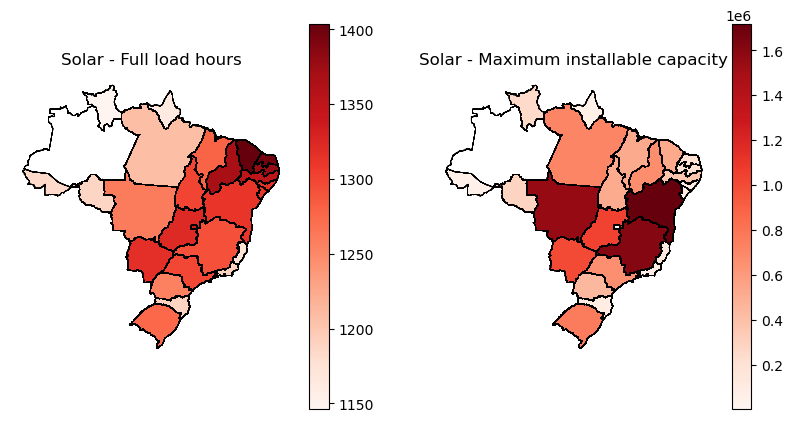

/tmp/ipykernel_1095569/942791852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_tech["carrier_type"] = gen_tech.carrier.str.extract(r"(\D+)")
/tmp/ipykernel_1095569/942791852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_tech["flh"] = n.generators_t.p_max_pu[gen_tech.index].sum()


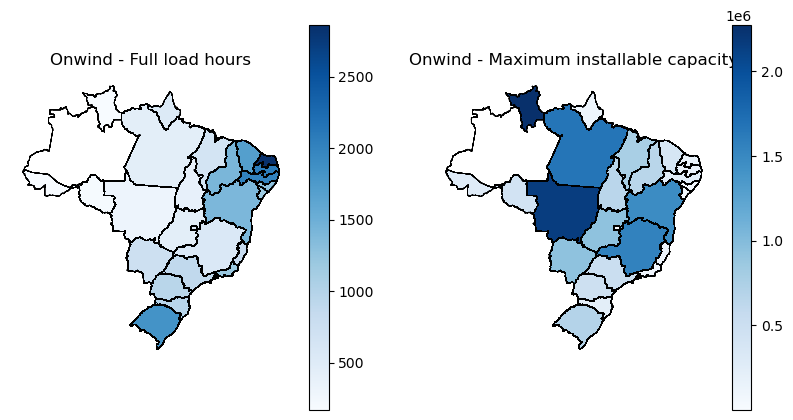

/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Va

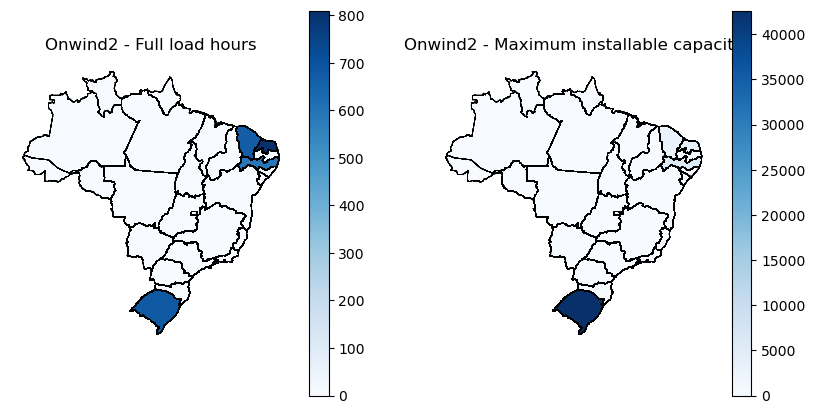

/tmp/ipykernel_1095569/942791852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_tech["carrier_type"] = gen_tech.carrier.str.extract(r"(\D+)")
/tmp/ipykernel_1095569/942791852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_tech["flh"] = n.generators_t.p_max_pu[gen_tech.index].sum()


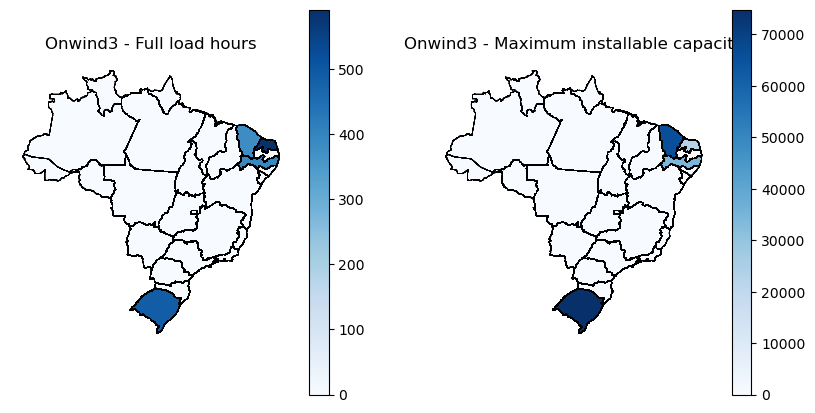

In [7]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_generation_tech(n, carrier, regions_file):
    gen_tech = n.generators.query(f"carrier == '{carrier}'")
    # Initialize carrier type as carrier without integer at the end of string
    gen_tech["carrier_type"] = gen_tech.carrier.str.extract(r"(\D+)")
    # Make cmap dictionary with Blues for onwind carrier type and Reds for solar carrier type
    cmap = {"onwind": "Blues", "solar": "Reds"}
    gen_tech["flh"] = n.generators_t.p_max_pu[gen_tech.index].sum()
    if carrier == "solar":
        breakpoint()
    gen_tech.set_index("bus", inplace=True)
    regions_onshore = gpd.read_file(regions_file).set_index("shape_id")
    # Append to every index the suffix _AC
    regions_onshore.index = regions_onshore.index + "_AC"
    regions_onshore["flh"] = gen_tech["flh"]
    regions_onshore["p_nom_max"] = gen_tech.p_nom_max
    # Do two map plots, one with flh and one with p_nom_max as color
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Reduced size by half
    regions_onshore.boundary.plot(ax=ax[0], color="black", linewidth=0.5)
    regions_onshore.plot(column="flh", legend=True, ax=ax[0], cmap=cmap[gen_tech["carrier_type"].iloc[0]])
    regions_onshore.boundary.plot(ax=ax[1], color="black", linewidth=0.5)
    regions_onshore.plot(column="p_nom_max", legend=True, ax=ax[1], cmap=cmap[gen_tech["carrier_type"].iloc[0]])
    ax[0].set_title(f"{carrier.capitalize()} - Full load hours")
    ax[1].set_title(f"{carrier.capitalize()} - Maximum installable capacity")
    # Turn axis off
    for a in ax:
        a.axis("off")
    plt.show()

# Example usage
network_files = [
    "/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/pypsa-earth/networks/elec_s_11_ec_lv2.0_Co2L.nc",
    "/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/results/0909_integrate_enertile/prenetworks/elec_s_11_ec_lv2.0_Co2L_144H_2030_0.071_AB_presec.nc"
]
regions_file = "/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/pypsa-earth/resources/bus_regions/regions_onshore.geojson"
carriers = ["solar", "onwind"]
presec_carriers = ["onwind2", "onwind3"]

for network_file in network_files:
    n = pypsa.Network(network_file)
    if "_presec" in network_file:
        for carrier in presec_carriers:
            plot_generation_tech(n, carrier, regions_file)
    else:
        for carrier in carriers:
            plot_generation_tech(n, carrier, regions_file)

In [8]:
import os
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_generation_tech(n, carrier, regions_file, title_suffix, ax, cmap):
    gen_tech = n.generators.query(f"carrier == '{carrier}'")
    gen_tech["carrier_type"] = gen_tech.carrier.str.extract(r"(\D+)")
    gen_tech["flh"] = n.snapshot_weightings.generators @ n.generators_t.p_max_pu[gen_tech.index]
    gen_tech.set_index("bus", inplace=True)
    regions_onshore = gpd.read_file(regions_file).set_index("shape_id")
    regions_onshore.index = regions_onshore.index + "_AC"
    regions_onshore["flh"] = gen_tech["flh"]
    regions_onshore["p_nom_max"] = gen_tech.p_nom_max

    regions_onshore.boundary.plot(ax=ax, color="black", linewidth=0.5)
    regions_onshore.plot(column="flh", legend=True, ax=ax, cmap=cmap)
    ax.set_title(f"{carrier.capitalize()} - Full load hours\n({title_suffix})", fontsize=10)
    ax.axis("off")

def plot_combined_tech(n1, n2, carrier, regions_file, output_dir):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    cmap = {"onwind": "Blues", "solar": "Reds"}[carrier]

    plot_generation_tech(n1, carrier, regions_file, "pre-overriding", axes[0, 0], cmap)
    plot_generation_tech(n1, carrier, regions_file, "pre-overriding", axes[0, 1], cmap)
    plot_generation_tech(n2, carrier, regions_file, "post-overriding", axes[1, 0], cmap)
    plot_generation_tech(n2, carrier, regions_file, "post-overriding", axes[1, 1], cmap)

    plt.tight_layout()
    output_path = os.path.join(output_dir, f"{carrier}_combined.png")
    plt.savefig(output_path)
    plt.close()

# Example usage
network_files = [
    ("/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/pypsa-earth/networks/elec_s_11_ec_lv2.0_Co2L.nc", "pre-overriding"),
    ("/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/results/0909_integrate_enertile/prenetworks/elec_s_11_ec_lv2.0_Co2L_144H_2030_0.071_AB_presec.nc", "post-overriding")
]
regions_file = "/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/pypsa-earth/resources/bus_regions/regions_onshore.geojson"
carriers = ["solar", "onwind"]
presec_carriers = ["onwind2", "onwind3"]

# Create output directory if it doesn't exist
output_dir = os.path.join(os.getcwd(), "outputs")
os.makedirs(output_dir, exist_ok=True)

# Load networks
n1 = pypsa.Network(network_files[0][0])
n2 = pypsa.Network(network_files[1][0])

# Plot combined figures for solar and onwind
for carrier in carriers:
    plot_combined_tech(n1, n2, carrier, regions_file, output_dir)

# Plot individual figures for onwind2 and onwind3
for carrier in presec_carriers:
    plot_generation_tech(n2, carrier, regions_file, "post-overriding", plt.gca(), "Blues")
    plt.tight_layout()
    output_path = os.path.join(output_dir, f"{carrier}_post-overriding.png")
    plt.savefig(output_path)
    plt.close()

/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/home/cpschau/miniforge3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Va

In [ ]:
n = pyppsa.Network("/home/cpschau/Code/dev/BRIGHT/submodules/pypsa-earth-sec/pypsa-earth/networks/elec_s_11_ec_lv2.0_Co2L.nc")
solar = n.generators.query("carrier == 'solar'")
solar_flh = n.snapshot_weightings.generators @ n.generators_t.p_max_pu[solar.index]
solar_flh